### MLDA@EEE Deep Learning Week Special:
# **Text Generator using RNN**

This notebook is part of MLDA@EEE's series of workshops during the Deep Learning week.

Designed to run in Google Colab.



In this workshop, we assumed that you have attended the workshops in pre-deep learning week and have basic knowledge of **Python** programming, **deep learning** as well as **neural network** Basics.
If not, don't worry, as you will be instructed step by step in this pratical session to apply what you learnt during the tutorial session. If you encounter any technical issues or need assistance from us, you can ask us in the ZOOM chat and a helper will come to you as soon as possible.

The structure of this pratical session is listed below:
1. Text Processing Basics
2. RNN Building Basics
3. Lyrics Generator
4. Shakespeare Generator


### **Connect to GPU instance (Recommend)**
To connect to GPU instance on Google Colab, follow the instruction below

Edit > Notebook settings > Hardware accelerator > GPU

## **1. Text Processing Basics**

Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens, perhaps at the same time throwing away certain characters, such as punctuation.

To give you a more intuitive perspective, we will start with a short file 'eee-overview.txt' and do some practices on text processing basics first.

In [1]:
# download 'eee-overview.txt' file
!wget https://ycrao573.github.io/rnn-workshop/eee-overview.txt

--2020-10-02 13:50:05--  https://ycrao573.github.io/rnn-workshop/eee-overview.txt
Resolving ycrao573.github.io (ycrao573.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to ycrao573.github.io (ycrao573.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3336 (3.3K) [text/plain]
Saving to: ‘eee-overview.txt’

eee-overview.txt    100%[===================>]   3.26K  --.-KB/s    in 0s      

2020-10-02 13:50:05 (37.5 MB/s) - ‘eee-overview.txt’ saved [3336/3336]



In [2]:
overview = open('eee-overview.txt', 'r').read()
# length of text is the number of characters in it
print('Length of text: {} characters'.format(len(overview)))
print('First 100 characters: \n', overview[:100])

Length of text: 3322 characters
First 100 characters: 
 The School of Electrical and Electronic Engineering (NTU EEE) began as one of the three founding sch


In [3]:
# The unique characters in the file
vocab = sorted(set(overview))
print ('{} unique characters'.format(len(vocab)))

68 unique characters


In [4]:
overview = overview.replace('\n', ' ').replace('\t',' ').lower()

### ***TASK 1: Text Pre-Processing - Special Characters Cleaning***

Please only change the code in **\# INSERT YOUR CODE HERE** or **None**

In [6]:
corpus = overview
stopChars = [',','(',')','.','-','[',']','"','/','&','!','\'','?', '  '] # list of stop charaters (e.g. ',', '(', '-')
# use for loop to iterate over stopChars and replace them with space
# hint: use string's replace(x, y) method and store in 'corpus'
# INSERT YOUR CODE HERE
for char in stopChars:
  corpus = corpus.replace(char, '')

print(corpus[:100])

the school of electrical and electronic engineering ntu eee began as one of the three founding schoo


In [7]:
corpus_words = [i for i in corpus.split() if i]
corpus_words[:5]

['the', 'school', 'of', 'electrical', 'and']

In [8]:
map(str.strip, corpus_words)
vocab = sorted(set(corpus_words))
print('Corpus length (in words):', len(corpus_words))
print('Unique words in corpus: {}'.format(len(vocab)))

Corpus length (in words): 473
Unique words in corpus: 260


### ***TASK 2: Use Index Number to Represent the Word***

In this task, you will assign an index to each word in string 's', e.g. {1: 'eee'}

You are encouraged to use dict and list comprehension to perform assignment and substitution.


In [9]:
s = 'the school of electrical and electronic engineering ntu eee began as one of the three'
# iterate 'vocab', create a dictionary called word2idx whose index start with zero
word2idx = {u: i for i, u in enumerate(vocab)}
print(word2idx)
# iterate word2idx and replace word with number (index)
# print them in the below
# INSERT YOUR CODE HERE
[word2idx[i] for i in s.split()]

{'$90': 0, '1000': 1, '11th': 2, '13': 3, '150': 4, '194': 5, '1985': 6, '1999': 7, '20': 8, '20000': 9, '2011': 10, '2017': 11, '2020': 12, '2020electricalelectronic': 13, '21': 14, '300': 15, '3000': 16, '4': 17, '50': 18, '6th': 19, '7th': 20, '9': 21, 'a': 22, 'about': 23, 'academic': 24, 'active': 25, 'activities': 26, 'administrative': 27, 'advanced': 28, 'ahead': 29, 'all': 30, 'also': 31, 'alumni': 32, 'ambitions': 33, 'an': 34, 'analytics': 35, 'and': 36, 'annualised': 37, 'aoba': 38, 'apart': 39, 'are': 40, 'areas': 41, 'around': 42, 'artificial': 43, 'as': 44, 'asian': 45, 'autonomous': 46, 'average': 47, 'backed': 48, 'backgrounds': 49, 'batch': 50, 'become': 51, 'began': 52, 'being': 53, 'besides': 54, 'big': 55, 'biomedical': 56, 'both': 57, 'broad': 58, 'by': 59, 'centre': 60, 'centres': 61, 'challengesntu': 62, 'close': 63, 'closely': 64, 'collaborations': 65, 'communications': 66, 'companies': 67, 'competent': 68, 'consistently': 69, 'consists': 70, 'continues': 71, 'c

[225, 189, 156, 86, 36, 87, 91, 153, 84, 52, 44, 159, 156, 225, 232]

Now, we will introduce tensorflow library so that we can process our text with higher quality and efficiency.

Let's start with tokenization:

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [11]:
sentences = [
    'I love coffee',
    'I do not like tea.',
    'We all love MLDA!'
]
tokenizer = Tokenizer(num_words = 32)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print('word_index: ', word_index)
test_sen = [
    'I like coffee.',
    'You really love tea?',
    'We love MLDA ah!'
]
test_seq = tokenizer.texts_to_sequences(test_sen)
print(test_seq)

word_index:  {'i': 1, 'love': 2, 'coffee': 3, 'do': 4, 'not': 5, 'like': 6, 'tea': 7, 'we': 8, 'all': 9, 'mlda': 10}
[[1, 6, 3], [2, 7], [8, 2, 10]]


We may also consider adding *oov_token*. Keras lets us define an **Out Of Vocab token** - this will replace **any unknown word**s with **a token of our choosing**. This is better than just throwing away unknown words since it tells our model there was information here.

In [12]:
tokenizer = Tokenizer(num_words = 32, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print('word_index: ', word_index)
sequences = tokenizer.texts_to_sequences(sentences)
test_seq = tokenizer.texts_to_sequences(test_sen)
print(test_seq)

word_index:  {'<OOV>': 1, 'i': 2, 'love': 3, 'coffee': 4, 'do': 5, 'not': 6, 'like': 7, 'tea': 8, 'we': 9, 'all': 10, 'mlda': 11}
[[2, 7, 4], [1, 1, 3, 8], [9, 3, 11, 1]]


All the neural networks require to have inputs that **have the same shape and size**. However, when we pre-process and use the texts as **inputs for our model** e.g. LSTM, **not all the sentences have the same length**. In other words, naturally, some of the sentences are longer or shorter. We need to have the inputs with the same size, this is where the **padding is necessary**.

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 32, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=8)
print(word_index)
print(sequences)
print(padded)

{'<OOV>': 1, 'i': 2, 'love': 3, 'coffee': 4, 'do': 5, 'not': 6, 'like': 7, 'tea': 8, 'we': 9, 'all': 10, 'mlda': 11}
[[2, 3, 4], [2, 5, 6, 7, 8], [9, 10, 3, 11]]
[[ 0  0  0  0  0  2  3  4]
 [ 0  0  0  2  5  6  7  8]
 [ 0  0  0  0  9 10  3 11]]


## **2. RNN Building Basics**

**Recurrent neural networks (RNN)** are a class of neural networks that is powerful for modeling sequence data such as time series or natural language. Schematically, a RNN layer uses a for loop to iterate over the timesteps of a sequence, while maintaining an internal state that encodes information about the timesteps it has seen so far.

The **Keras RNN API** is designed with a focus on:


*   Ease of use: the built-in keras.layers.RNN, keras.layers.LSTM, keras.layers.GRU layers enable you to quickly build recurrent models without having to make difficult configuration choices.

*   **Ease of customization**: You can also define your own RNN cell layer (the inner part of the for loop) with custom behavior, and use it with the generic keras.layers.RNN layer (the for loop itself). This allows you to quickly prototype different research ideas in a flexible way with minimal code.

For more information about building RNN in keras, please visit TensorFlow official documentation [here](https://www.tensorflow.org/guide/keras/rnn)

In [14]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [15]:
# initialize a tokenizer first
tokenizer = Tokenizer()

overview = open('eee-overview.txt', 'r').read()
corpus = overview.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'of': 3, 'in': 4, 'research': 5, 'ntu': 6, 'school': 7, 'eee': 8, 'engineering': 9, 'first': 10, 'are': 11, 'to': 12, 'satellite': 13, 'over': 14, 'with': 15, 'a': 16, 'is': 17, 'by': 18, 'also': 19, 'from': 20, 'electrical': 21, 'electronic': 22, 'one': 23, 'schools': 24, 'technological': 25, 'students': 26, 'has': 27, 'ranked': 28, 'world': 29, 'members': 30, 'centres': 31, 'undergraduate': 32, '9': 33, 'as': 34, 'nanyang': 35, 'university': 36, 'graduates': 37, 'that': 38, 'top': 39, '2020': 40, 'for': 41, 'academic': 42, 'faculty': 43, 'broad': 44, 'diverse': 45, 'supported': 46, 'researchers': 47, 'these': 48, 'support': 49, 'satellites': 50, 'partners': 51, '–': 52, 'multinational': 53, 'companies': 54, 'our': 55, 'set': 56, 'up': 57, 'laboratories': 58, 'development': 59, 'being': 60, 'an': 61, 'launched': 62, 'centre': 63, 'space': 64, 'singapore': 65, '13': 66, 'graduate': 67, 'began': 68, 'three': 69, 'founding': 70, 'then': 71, 'known': 72, 'institute': 

In [16]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

Here, you can choose SimpleRNN, LSTM, GRU layers in *model.add(XXX(64))* to see the effects of different RNN layers.

In [30]:
# model building
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(GRU(64))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 58, 64)            201792    
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dense_5 (Dense)              (None, 3153)              204945    
Total params: 431,697
Trainable params: 431,697
Non-trainable params: 0
_________________________________________________________________


In [20]:
simple_history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
16/16 [==============================] - 0s 19ms/step - loss: 5.5725 - accuracy: 0.0165
Epoch 2/100
16/16 [==============================] - 0s 19ms/step - loss: 5.5435 - accuracy: 0.0723
Epoch 3/100
16/16 [==============================] - 0s 19ms/step - loss: 5.4039 - accuracy: 0.0640
Epoch 4/100
16/16 [==============================] - 0s 19ms/step - loss: 5.1872 - accuracy: 0.0599
Epoch 5/100
16/16 [==============================] - 0s 19ms/step - loss: 5.0970 - accuracy: 0.0579
Epoch 6/100
16/16 [==============================] - 0s 18ms/step - loss: 5.0525 - accuracy: 0.0579
Epoch 7/100
16/16 [==============================] - 0s 19ms/step - loss: 5.0151 - accuracy: 0.0579
Epoch 8/100
16/16 [==============================] - 0s 19ms/step - loss: 4.9822 - accuracy: 0.0682
Epoch 9/100
16/16 [==============================] - 0s 18ms/step - loss: 4.9078 - accuracy: 0.0682
Epoch 10/100
16/16 [==============================] - 0s 19ms/step - loss: 4.8462 - accuracy: 0.0806

In [21]:
seed_text = "eee is"
next_words = 20
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
eee is also supported by over five hundred research technical and administrative staff members from 21 countries whom have broad diverse backgrounds


## **3. Lyrics Generator (Word Tokenization)**

This tutorial demonstate how to generator text based on given text using word tokenization and RNN. The text containing the song titles and the lyrics of many famous songs of Beatles (credit: [petrosDemetrakopoulos](https://github.com/petrosDemetrakopoulos/)). So, given a sequence of words from Beatles lyrics, it can predict the next words.





<img src = "https://miro.medium.com/max/2560/0*SUipu9efyQeKHdlk." width = 70%>

### ***Task 3: Build the Model and Train It!***

In this task, you will get the chance to experience the whole process of building a lyrics generator using Tensorflow Keras.

Following the steps in **section two** (very important, make sure you understand them all) and create a lyrics generator for given text file.

In [22]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, GRU, SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [23]:
!wget https://ycrao573.github.io/rnn-workshop/lyrics.txt

--2020-10-02 13:57:10--  https://ycrao573.github.io/rnn-workshop/lyrics.txt
Resolving ycrao573.github.io (ycrao573.github.io)... 185.199.108.153, 185.199.110.153, 185.199.111.153, ...
Connecting to ycrao573.github.io (ycrao573.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245890 (240K) [text/plain]
Saving to: ‘lyrics.txt’

lyrics.txt          100%[===================>] 240.13K  --.-KB/s    in 0.05s   

2020-10-02 13:57:10 (4.50 MB/s) - ‘lyrics.txt’ saved [245890/245890]



In [24]:
# open the 'lyrics.txt' file
text = open('lyrics.txt', 'r').read()
# print length of text and first 250 words of the text
# INSERT YOUR CODE HERE
print ('Length of text: {} characters'.format(len(text)))
print (text[:250])

Length of text: 245664 characters
A Day In The Life
-----------------
I read the news today oh boy
About a lucky man who made the grade
And though the news was rather sad
Well I just had to laugh
I saw the photograph.
He blew his mind out in a car
He didn't notice that the lights hav


In [27]:
tokenizer = Tokenizer()

corpus = text.lower().split("\n")

# Tokenization Process
# INSERT YOUR CODE HERE
tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1 # length of the corpus

print(tokenizer.word_index)
print(total_words)

{'you': 1, 'i': 2, 'the': 3, 'me': 4, 'to': 5, 'and': 6, 'a': 7, 'love': 8, 'my': 9, 'in': 10, 'be': 11, 'that': 12, "don't": 13, 'it': 14, 'do': 15, 'all': 16, "i'm": 17, 'on': 18, 'your': 19, 'of': 20, 'is': 21, 'oh': 22, 'know': 23, 'so': 24, 'she': 25, "it's": 26, 'for': 27, 'when': 28, 'baby': 29, 'can': 30, 'but': 31, 'now': 32, 'her': 33, 'well': 34, 'no': 35, 'if': 36, 'got': 37, 'what': 38, 'with': 39, 'want': 40, 'just': 41, 'see': 42, 'come': 43, 'say': 44, 'like': 45, 'one': 46, "you're": 47, "i'll": 48, 'girl': 49, 'yeah': 50, 'gonna': 51, 'little': 52, 'get': 53, 'go': 54, 'down': 55, 'will': 56, 'time': 57, "she's": 58, 'let': 59, 'never': 60, 'tell': 61, 'was': 62, 'day': 63, 'said': 64, 'yeh': 65, 'back': 66, 'we': 67, 'they': 68, 'how': 69, 'there': 70, 'way': 71, "can't": 72, 'make': 73, 'man': 74, 'good': 75, 'have': 76, 'over': 77, "i've": 78, 'here': 79, 'are': 80, 'long': 81, 'not': 82, 'he': 83, 'up': 84, 'hey': 85, 'as': 86, "that's": 87, 'night': 88, 'take': 8

In [28]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		# Generate n-gram sequences
		# INSERT YOUR CODE HERE
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# max of input sequences
max_sequence_len = max([len(x) for x in input_sequences])
# pad sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

print(input_sequences)

# create predictors and label
predictors, labels = input_sequences[:,:-1],input_sequences[:,-1]
label = tf.keras.utils.to_categorical(labels, num_classes=total_words)

[[  0   0   0 ...   0   7  63]
 [  0   0   0 ...   7  63  10]
 [  0   0   0 ...  63  10   3]
 ...
 [  0   0   0 ...   3 530  54]
 [  0   0   0 ... 530  54 531]
 [  0   0   0 ...  54 531  10]]


In [29]:
# Build your own RNN model with LSTM or GRU layers
# INSERT YOUR CODE HERE
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 58, 64)            201792    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense_4 (Dense)              (None, 3153)              406737    
Total params: 674,577
Trainable params: 674,577
Non-trainable params: 0
_________________________________________________________________


For saving your time, just train 20 epochs (each epoch is around 20 seconds) and test the result.

In [31]:
# train your model and store it in history
history = model.fit(predictors, label, epochs=20, verbose=1)

Epoch 1/20
1290/1290 [==============================] - 25s 19ms/step - loss: 6.0493 - accuracy: 0.0510
Epoch 2/20
1290/1290 [==============================] - 25s 19ms/step - loss: 5.3878 - accuracy: 0.0849
Epoch 3/20
1290/1290 [==============================] - 25s 19ms/step - loss: 4.9067 - accuracy: 0.1372
Epoch 4/20
1290/1290 [==============================] - 25s 19ms/step - loss: 4.4968 - accuracy: 0.1820
Epoch 5/20
1290/1290 [==============================] - 25s 19ms/step - loss: 4.1621 - accuracy: 0.2222
Epoch 6/20
1290/1290 [==============================] - 25s 19ms/step - loss: 3.8790 - accuracy: 0.2594
Epoch 7/20
1290/1290 [==============================] - 25s 19ms/step - loss: 3.6316 - accuracy: 0.2935
Epoch 8/20
1290/1290 [==============================] - 25s 19ms/step - loss: 3.4168 - accuracy: 0.3220
Epoch 9/20
1290/1290 [==============================] - 25s 19ms/step - loss: 3.2280 - accuracy: 0.3511
Epoch 10/20
1290/1290 [==============================] - 25s 19m

### ***Task 4: Our Accuracy Graph over Epochs***

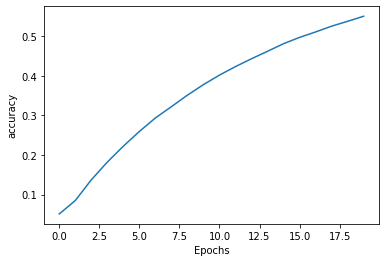

In [32]:
import matplotlib.pyplot as plt

# Use pyplot to plot a graph with x as epoch number, y as accuracy
def plot_graphs(history, string):
  #INSERT YOUR CODE HERE
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

### ***Task 5: Predict Words Using Your Starting Text***

In [34]:
seed_text = "One day"
next_words = 20
  
for _ in range(next_words):
	# INSERT YOUR CODE HERE
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

print(seed_text)

One day the sun comes the less one thing you want to leave me better leave you now you know you twist


## **4. Shakespeare Generator (Character Tokenization)**

This tutorial demonstrates how to generate text using a character-based RNN. We will work with a dataset of Shakespeare's writing from Andrej Karpathy's The Unreasonable Effectiveness of Recurrent Neural Networks. Given a sequence of characters from this data ("Shakespear"), train a model to predict the next character in the sequence ("e"). Longer sequences of text can be generated by calling the model repeatedly.

In [35]:
import tensorflow as tf
import numpy as np
import time
#Download the dataset
path_to_file = tf.keras.utils.get_file('shakespeare.txt',
                                       'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')
#Explore the data
text = open(path_to_file, 'r').read()
print(text[:100])

1122304/1115394 [==============================] - 0s 0us/step
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


### ***Task 6: Text Processing on Character Level***

In [38]:
# Create the vocab of the given text
vocab = sorted(set(text))
print ('{} unique characters'.format(len(vocab)))

# Creating a mapping from unique characters to indices
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)
print(idx2char)

# Map the character to corresponding integer (char2idx)
text_as_int = np.array([char2idx[c] for c in text])
for char,_ in zip(char2idx, range(5)):
    print(repr(char), ':', char2idx[char])

65 unique characters
['\n' ' ' '!' '$' '&' "'" ',' '-' '.' '3' ':' ';' '?' 'A' 'B' 'C' 'D' 'E'
 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W'
 'X' 'Y' 'Z' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o'
 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']
'\n' : 0
' ' : 1
'!' : 2
'$' : 3
'&' : 4


In [39]:
# The maximum length sentence we want for a single input in characters
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for i in char_dataset.take(5):
  print(idx2char[i.numpy()])

F
i
r
s
t


In [40]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)
for item in sequences.take(5):
  print(repr(''.join(idx2char[item.numpy()])))

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [41]:
def split_input_target(chunk):
  input_text = chunk[:-1]
  target_text = chunk[1:]
  return input_text, target_text
dataset = sequences.map(split_input_target)

In [42]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset shapes: ((64, 100), (64, 100)), types: (tf.int64, tf.int64)>

In [43]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [44]:
# Helper function for building new model
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):

  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.LSTM(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])

  return model

# return the chosen loss parameter
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

### ***Task 7: Build Shakespeare Generator Model***

In [47]:
# Complete the model infomation below

model = build_model(
    vocab_size = len(vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE)

print(model.summary())

model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (64, None, 256)           16640     
_________________________________________________________________
lstm_5 (LSTM)                (64, None, 1024)          5246976   
_________________________________________________________________
dense_7 (Dense)              (64, None, 65)            66625     
Total params: 5,330,241
Trainable params: 5,330,241
Non-trainable params: 0
_________________________________________________________________
None


In [48]:
import os
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

Each epoch will take around 30 seconds, choose your own epoch number wisely!

In [49]:
# Train your model here
history = model.fit(dataset, epochs=20, callbacks=[checkpoint_callback], verbose=1)

Epoch 1/20
172/172 [==============================] - 29s 168ms/step - loss: 2.6460 - accuracy: 0.2752
Epoch 2/20
172/172 [==============================] - 29s 167ms/step - loss: 1.9380 - accuracy: 0.4333
Epoch 3/20
172/172 [==============================] - 29s 167ms/step - loss: 1.6778 - accuracy: 0.5038
Epoch 4/20
172/172 [==============================] - 29s 167ms/step - loss: 1.5347 - accuracy: 0.5413
Epoch 5/20
172/172 [==============================] - 29s 167ms/step - loss: 1.4467 - accuracy: 0.5639
Epoch 6/20
172/172 [==============================] - 29s 168ms/step - loss: 1.3859 - accuracy: 0.5794
Epoch 7/20
172/172 [==============================] - 29s 168ms/step - loss: 1.3400 - accuracy: 0.5916
Epoch 8/20
172/172 [==============================] - 29s 168ms/step - loss: 1.3002 - accuracy: 0.6021
Epoch 9/20
172/172 [==============================] - 29s 168ms/step - loss: 1.2642 - accuracy: 0.6116
Epoch 10/20
172/172 [==============================] - 29s 168ms/step - l

In [50]:
# Simplify the output model with batch_size = 1 for ease of prediction
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

In [51]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 1000

  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
    predictions = model(input_eval)
    # remove the batch dimension
    predictions = tf.squeeze(predictions, 0)

    # using a categorical distribution to predict the character returned by the model
    predictions = predictions / temperature
    predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

    # We pass the predicted character as the next input to the model
    # along with the previous hidden state
    input_eval = tf.expand_dims([predicted_id], 0)

    text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

### ***Task 8: Check Your Prediction Result***

In [52]:
# Based on the helper function generate_text(model, start_string) 
# for generating text using the learned model above
# print the generated text with your preferred starting string

# INSERT YOUR CODE HERE
print(generate_text(model, start_string="ROMEO: "))

ROMEO: Send me by joy.
I say he laws me presently.

Third March:
My lord-short in his house, you'll tell me think
That he hithest uned the watch alike. Come about me.

CLIFFORD:
Plassee, my lord:
No, no, gentle Cleasing: for we mean to stand
not on her daughter's name; and there it is
A RIVE:
Ond gracio, my grooms are in their way:
There speak no general.

Clown:
If it be mute: I'll be an
greaternghy arms:
Comes true to me that did you love to live.
Go you bring and grants with words.
Sirrah, deserve: I have brought you to your
soul encompation. If you fight good nd from hence and mistress.

SICINIUS:
Spoile no uncle?

First Servant:
This, sitting and are thou further changeance; he
Thou incarrems choler thou didst usurp the hour!

ANGELO:
The guests man.
Coiser this is thine eyes commanded.

QUEEN:
Yea, ay, as heaven as a business purpose.
Nor farewell, good cousin, furt up your speech! I desire his
That honourable evionc; my wife, like anning me; for whom it will,
Till we with cloack

## **(Optional) Text Generation using GPT-2 Transformer**

OpenAI GPT-2 model was proposed in Language Models are Unsupervised Multitask Learners by Alec Radford, Jeffrey Wu, Rewon Child, David Luan, Dario Amodei and Ilya Sutskever. It’s a causal (unidirectional) transformer pretrained using language modeling on a very large corpus of ~40 GB of text data.

GPT-2 is a large transformer-based language model with 1.5 billion parameters, trained on a dataset of 8 million web pages. GPT-2 is trained with a simple objective: predict the next word, given all of the previous words within some text. The diversity of the dataset causes this simple goal to contain naturally occurring demonstrations of many tasks across diverse domains. GPT-2 is a direct scale-up of GPT, with more than 10X the parameters and trained on more than 10X the amount of data.

Here, we will use a lighter version, [GPT-2 Medium Model](https://huggingface.co/gpt2-medium) (which is around 1.5 GB) for your convenience and demo purpose.

In [53]:
!pip install transformers

     |████████████████████████████████| 1.1MB 2.8MB/s 
     |████████████████████████████████| 1.1MB 9.9MB/s 
     |████████████████████████████████| 3.0MB 18.2MB/s 
     |████████████████████████████████| 890kB 16.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=e946fbe5d9b91b9bb9c638cd52cb23fd36f9f57256140e9e2249f94b4830659a
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [54]:
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer, GPT2Config

In [55]:
model_name = "gpt2-medium"
config = GPT2Config.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
gptmodel = TFGPT2LMHeadModel.from_pretrained(model_name, config=config)

All model checkpoint weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2-medium.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [56]:
from transformers import set_seed
set_seed(23)

In [57]:
input_ids = tokenizer.encode('I love machine learning and data analytics,', return_tensors='tf')
input_ids

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=
array([[   40,  1842,  4572,  4673,   290,  1366, 23696,    11]],
      dtype=int32)>

In [58]:
output = gptmodel.generate(input_ids, max_length=15)
print('Output:\n')
print(tokenizer.decode(output[0], skip_special_tokens=True))

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


Output:

I love machine learning and data analytics, but I'm not a big fan


In [59]:
sample_outputs = gptmodel.generate(
    input_ids,
    do_sample=True,
    max_length=30,
    top_k=50,
    top_p=0.95,
    num_return_sequences=8
)

for i, sample_output in enumerate(sample_outputs):
  
  print("{}: {}".format(i, tokenizer.decode(sample_output)))

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


0: I love machine learning and data analytics, but for me, the most important is data retention," she says. "Not only will it make me feel
1: I love machine learning and data analytics, but the problem I'm facing today is that I feel the need to learn it all over again because it's
2: I love machine learning and data analytics, but not all of these jobs are created equal, especially in academia. This is why the AI field as a
3: I love machine learning and data analytics, I love the tools I can use to apply some of these techniques to solve problems at scale. I see a
4: I love machine learning and data analytics, but I think we've moved beyond the state of the art of predictive modeling and machine learning into some kind of
5: I love machine learning and data analytics, so I really have no excuse for anything. The main reason I've taken the plunge into this endeavor is that
6: I love machine learning and data analytics, but what keeps me from doing it at a big company is the expense. T